# Pima Indians Diabetes Database

* * *
By Kongsakun Panyang

Email : Kongsakun@kkumail.com

Follow to kaggle project : https://www.kaggle.com/c/titanic

My kaggle profile : https://www.kaggle.com/kongsakunpanyang

My LinkedIn profile : https://www.linkedin.com/in/kongsakun-panyang-b35029230/

My upwork profile : https://www.upwork.com/freelancers/~01ab6f69eacc2cd33a

My GitHub profile : https://github.com/balliolon2
* * *

Data Science Pathway (According to Data Science Foundation: Fundamentals course in LinkedIn Learning)

Planning
1. Define Goals : The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
2. Organize Resource
3. Coordinate people
4. Schedule Project

Wrangling/Preparation
1. Get data : from kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
2. Clean data : Making data easy for use
3. Explore data : Data visualization
4. Refine data : Clean and shape it

Modeling
1. Create model
2. Validate model
3. Evaluate model
4. Refine model

Applying
1. Present model
2. Deploy model
3. Revisit model
4. Archive assets
* * * *

# Contents
1. Import Library & Files
2. Data analysis
3. Cleaning Data
4. Modeling
5. Presentation

Import Library
-----

In [597]:
import numpy as np # for linear algebra and operation
import pandas as pd # for dataframe
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
%matplotlib inline 

Import a file

In [598]:
data = pd.read_csv('diabetes.csv')

In [599]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mmHg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction 

Outcome = 1 (positive), 0 (negative)

### Data Analyze

In [600]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [601]:
pd.isnull(data).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null-data

all columns except 'Outcome' are numurical data

Outcome is Characteristic

#### Data visualization

Before visualization, I need to try to assume what are factors of Diabete. According to https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

Pregnancies : Gestational Diabete !

Glucose : Exactly yes!

BloodPressure : Exacly yes!

SkinThickness : Is it showing Metabolic syndrome? or just sign of obesity? However, I think it is also a factor.

Insulin : If you have insulin low or insulin resistance = Type 2 DM. If insulin = 0, Type 1 DM.

BMI : Showing Metabolic syndrome and obesity which cause to Type 2 DM.

DiabetesPedigreeFunction : Increase risk of Type 1 DM and Type 2 DM

Age : Women older than age 25 are at increased risk in gestational diabetes. Your risk increases as you get older in Type 2 DM.



* * *
Pregnancies

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

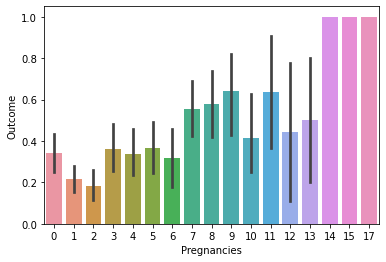

In [602]:
sns.barplot(x = 'Pregnancies', y = 'Outcome', data = data)

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

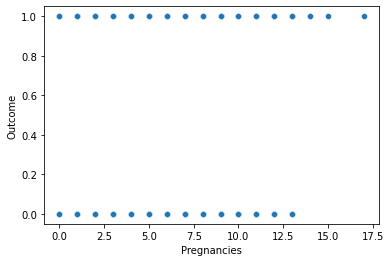

In [603]:
sns.scatterplot(x = 'Pregnancies', y = 'Outcome', data = data)

Glucose

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

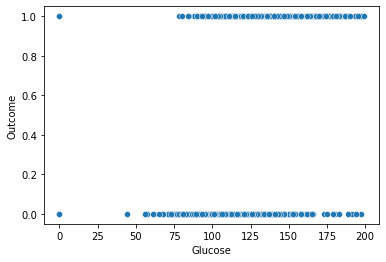

In [604]:
sns.scatterplot(x = 'Glucose', y = 'Outcome', data = data)

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

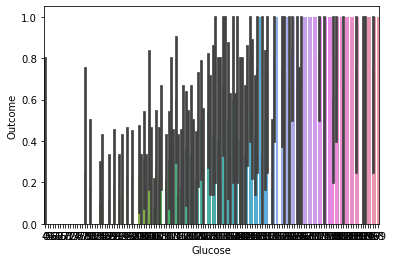

In [605]:
sns.barplot(x = 'Glucose', y = 'Outcome', data = data)

For Glucose, It is too many range. So I need to make groups!

According to MayoClinic, A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes. (For oral glucose intolerance)

[https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20blood%20sugar%20level%20less,mmol%2FL)%20indicates%20prediabetes.]

So I would like to group them to 'Normal' (0-140 mg/dL), 'High-1' (141-199), and 'High-2' (200+).

In [606]:
BG_group = [0, 140, 200, np.inf]
BG_label = ['Normal', 'High-1', 'High-2']

#create a new column
data['Glucose groups'] = pd.cut(data['Glucose'], BG_group, labels = BG_label)

<AxesSubplot:xlabel='Glucose groups', ylabel='Outcome'>

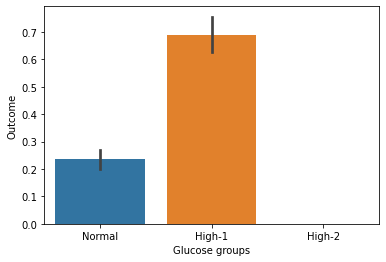

In [607]:
sns.barplot(x = 'Glucose groups', y = 'Outcome', data = data)

BloodPressure

I think it gonna be like Glucose, Thus I need to group them before

According to https://www.etoolsage.com/Chart/Blood_Pressure_Chart.asp

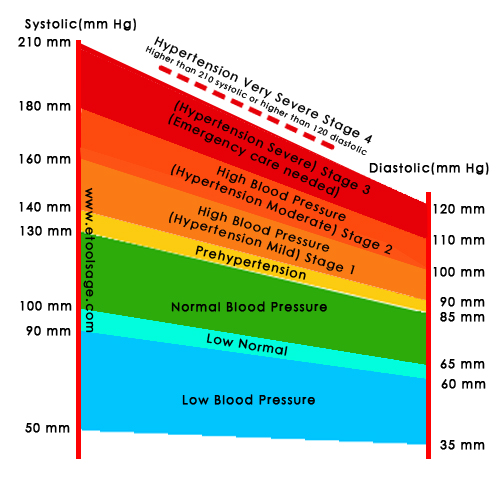

In [608]:
# I see someone has BP=0, that is imposible! so I need to label as 'Unknown'
BP_group = [0,35,60,65,85,90,100,110,120, np.inf]
BP_label = ['Low-2', 'Low-1', 'Pre-Low', 'Normal','Pre-High','High-1', 'High-2', 'High-3', 'High-4']

#create a new column
data['BP groups'] = pd.cut(data['BloodPressure'], BP_group, labels = BP_label)

<AxesSubplot:xlabel='BP groups', ylabel='Outcome'>

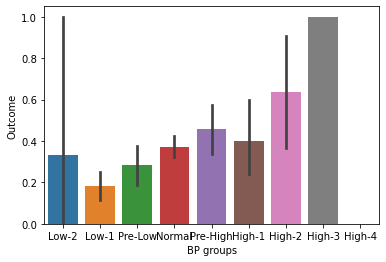

In [609]:
sns.barplot(x = 'BP groups', y = 'Outcome', data = data)

SkinThickness

I think it gonna be like Glucose, Thus I need to group them before

Because all patients are female, thus I would like to focus on female standard

According to https://basicmedicalkey.com/wxyz-2/ , they say 16.5 is standard for women and following to (https://medical-dictionary.thefreedictionary.com/) they say 23 is normal

Thus, I would like to group them into Low(lower than 16.5), normal (16.5-23), hight(23+)

In [610]:
ST_group = [0, 16.5, 23, np.inf]
ST_label = ['Low', 'Normal', 'High']

#create a new column
data['ST groups'] = pd.cut(data['SkinThickness'], ST_group, labels = ST_label)

<AxesSubplot:xlabel='ST groups', ylabel='Outcome'>

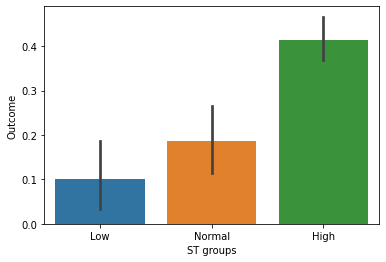

In [611]:
sns.barplot(x = 'ST groups', y = 'Outcome', data = data)

Insulin

Because I can not find range of insulin in mu U/ml and can not find range of them

I think I can visual data in other way

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

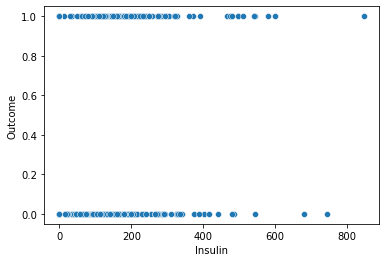

In [612]:
sns.scatterplot(x = 'Insulin', y = 'Outcome', data = data)

I can not find range of insulin, thus I need to group them by my idea.

Above show 0-800+

1 = 0-200, 2 = 200-400, 3 = 400-600, 4 = 600-800, 5 = 800+

In [613]:
ISU_group = [0, 200, 400, 600, 800, np.inf]
ISU_label = [1, 2, 3, 4, 5]

#create a new column
data['ISU groups'] = pd.cut(data['Insulin'], ISU_group, labels = ISU_label)

<AxesSubplot:xlabel='ISU groups', ylabel='Outcome'>

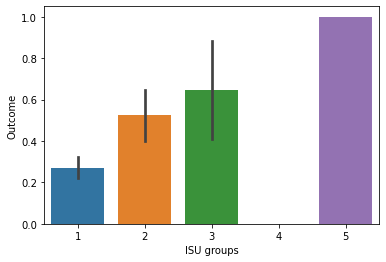

In [614]:
sns.barplot(x = 'ISU groups', y = 'Outcome', data = data)

According to (https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/expert-answers/hyperinsulinemia/faq-20058488#:~:text=Hyperinsulinemia%20(hi%2Dpur%2Din,which%20helps%20regulate%20blood%20sugar.) Hyperinsulinemia is often associated with Type 2 DM

BMI

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

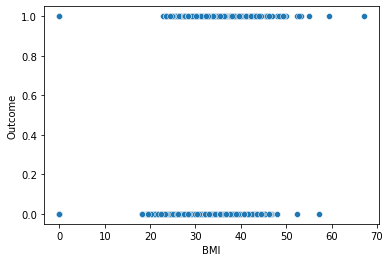

In [615]:
sns.scatterplot(x = 'BMI', y = 'Outcome', data = data)

I need to group them.
According to https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

In [616]:
BMI_group = [0, 18.5, 25, 30, np.inf]
BMI_label = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

#create a new column
data['BMI groups'] = pd.cut(data['BMI'], BMI_group, labels = BMI_label)

<AxesSubplot:xlabel='BMI groups', ylabel='Outcome'>

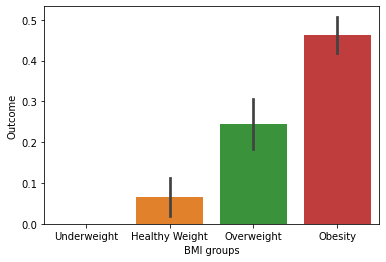

In [617]:
sns.barplot(x = 'BMI groups', y = 'Outcome', data = data)

DiabetesPedigreeFunction 

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

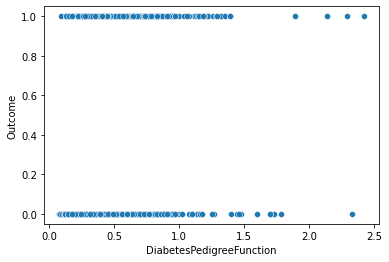

In [618]:
sns.scatterplot(x = 'DiabetesPedigreeFunction', y = 'Outcome', data = data)

Because I can not find the range of DiabetesPedigreeFunction, I would like to group them by my idea.

1 = 0-0.5, 2 = 0.5 - 1, 3 = 1 - 1.5, 4 = 1.5 - 2, 5 = 2+

In [619]:
DPF_group = [0, 0.5, 1, 1.5, 2, np.inf]
DPF_label = [1, 2, 3, 4, 5]

#create a new column
data['DPF groups'] = pd.cut(data['DiabetesPedigreeFunction'], DPF_group, labels = DPF_label)

<AxesSubplot:xlabel='DPF groups', ylabel='Outcome'>

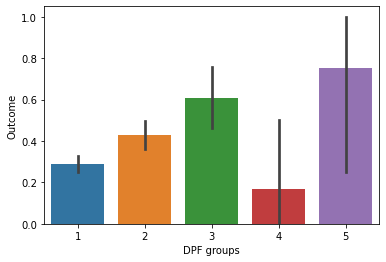

In [620]:
sns.barplot(x = 'DPF groups', y = 'Outcome', data = data)

Age

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

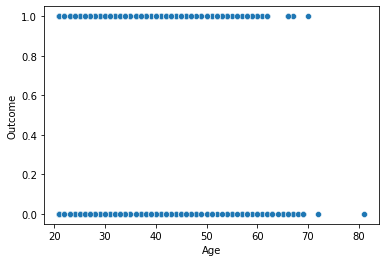

In [621]:
sns.scatterplot(x = 'Age', y = 'Outcome', data = data)

I need to group them. Above scatterplot shows 20-80

I need to follow like this

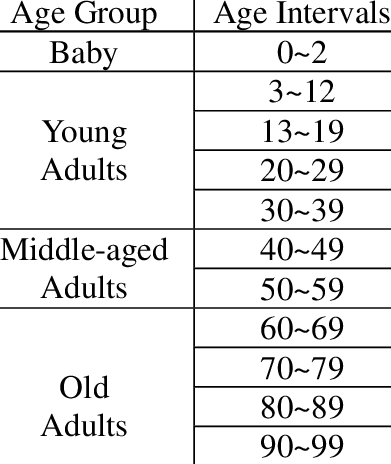

In [622]:
AGE_group = [0, 40, 60, np.inf]
AGE_label = ['Young Adult', 'Middle Adult', 'Old Adult']

#create a new column
data['AGE groups'] = pd.cut(data['Age'], AGE_group, labels = AGE_label)

<AxesSubplot:xlabel='AGE groups', ylabel='Outcome'>

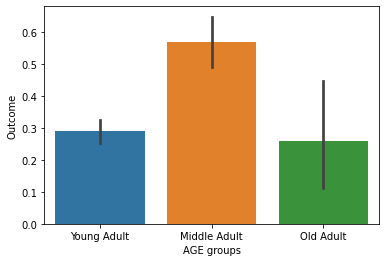

In [623]:
sns.barplot(x = 'AGE groups', y = 'Outcome', data = data)

### Data Clean

In [624]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose groups,BP groups,ST groups,ISU groups,BMI groups,DPF groups,AGE groups
0,6,148,72,35,0,33.6,0.627,50,1,High-1,Normal,High,NaN,Obesity,2,Middle Adult
1,1,85,66,29,0,26.6,0.351,31,0,Normal,Normal,High,NaN,Overweight,1,Young Adult
2,8,183,64,0,0,23.3,0.672,32,1,High-1,Pre-Low,NaN,NaN,Healthy Weight,2,Young Adult
3,1,89,66,23,94,28.1,0.167,21,0,Normal,Normal,Normal,1,Overweight,1,Young Adult
4,0,137,40,35,168,43.1,2.288,33,1,Normal,Low-1,High,1,Obesity,5,Young Adult
5,5,116,74,0,0,25.6,0.201,30,0,Normal,Normal,NaN,NaN,Overweight,1,Young Adult
6,3,78,50,32,88,31.0,0.248,26,1,Normal,Low-1,High,1,Obesity,1,Young Adult
7,10,115,0,0,0,35.3,0.134,29,0,Normal,NaN,NaN,NaN,Obesity,1,Young Adult
8,2,197,70,45,543,30.5,0.158,53,1,High-1,Normal,High,3,Obesity,1,Middle Adult
9,8,125,96,0,0,0.0,0.232,54,1,Normal,High-1,NaN,NaN,NaN,1,Middle Adult


We have Glucose groups, BP groups, ST groups, ISU groups, BMI groups, DPF groups, AGE groups instead of Glucose, BloodPressure	,SkinThickness,Insulin ,BMI, DiabetesPedigreeFunction , Age	

In [625]:
data = data.drop(['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin' ,'DiabetesPedigreeFunction', 'Age'], axis = 1)

In [626]:
data.head(10)

,Pregnancies,Outcome,Glucose groups,BP groups,ST groups,ISU groups,BMI groups,DPF groups,AGE groups
0,6,1,High-1,Normal,High,NaN,Obesity,2,Middle Adult
1,1,0,Normal,Normal,High,NaN,Overweight,1,Young Adult
2,8,1,High-1,Pre-Low,NaN,NaN,Healthy Weight,2,Young Adult
3,1,0,Normal,Normal,Normal,1,Overweight,1,Young Adult
4,0,1,Normal,Low-1,High,1,Obesity,5,Young Adult
5,5,0,Normal,Normal,NaN,NaN,Overweight,1,Young Adult
6,3,1,Normal,Low-1,High,1,Obesity,1,Young Adult
7,10,0,Normal,NaN,NaN,NaN,Obesity,1,Young Adult
8,2,1,High-1,Normal,High,3,Obesity,1,Middle Adult
9,8,1,Normal,High-1,NaN,NaN,NaN,1,Middle Adult


Convert labels into value

In [627]:
Glucose_groups = {
    'Normal' : 1, 
    'High-1' : 2, 
    'High-2' : 3
}

data['Glucose groups'] = data['Glucose groups'].map(Glucose_groups)

In [628]:
data['Glucose groups'].head()

0    2
1    1
2    2
3    1
4    1
Name: Glucose groups, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [629]:
BP_groups = {
    'Low-2' : 1,
    'Low-1' : 2,
    'Pre-Low' : 3, 
    'Normal' : 4,
    'Pre-High' : 5,
    'High-1' : 6,
    'High-2' : 7,
    'High-3' : 8,
    'High-4' : 9
}
data['BP groups'] = data['BP groups'].map(BP_groups)

In [630]:
data['BP groups'].head()

0    4
1    4
2    3
3    4
4    2
Name: BP groups, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [631]:
ST_groups = {
    'Low' : 1,
    'Normal' : 2,
    'High' : 3
}
data['ST groups'] = data['ST groups'].map(ST_groups)

In [632]:
data['ST groups'].head()

0      3
1      3
2    NaN
3      2
4      3
Name: ST groups, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [633]:
BMI_groups = {
    'Underweight' : 1,
    'Healthy Weight' : 2,
    'Overweight' : 3,
    'Obesity' : 4
}
data['BMI groups'] = data['BMI groups'].map(BMI_groups)

In [634]:
data['BMI groups'].head()

0    4
1    3
2    2
3    3
4    4
Name: BMI groups, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [635]:
AGE_groups = {
    'Young Adult' : 1,
    'Middle Adult' : 2,
    'Old Adult' : 3
}
data['AGE groups'] = data['AGE groups'].map(AGE_groups)

In [636]:
data['AGE groups'].head()

0    2
1    1
2    1
3    1
4    1
Name: AGE groups, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [637]:
data.head(10)

,Pregnancies,Outcome,Glucose groups,BP groups,ST groups,ISU groups,BMI groups,DPF groups,AGE groups
0,6,1,2,4,3,NaN,4,2,2
1,1,0,1,4,3,NaN,3,1,1
2,8,1,2,3,NaN,NaN,2,2,1
3,1,0,1,4,2,1,3,1,1
4,0,1,1,2,3,1,4,5,1
5,5,0,1,4,NaN,NaN,3,1,1
6,3,1,1,2,3,1,4,1,1
7,10,0,1,NaN,NaN,NaN,4,1,1
8,2,1,2,4,3,3,4,1,2
9,8,1,1,6,NaN,NaN,NaN,1,2


Check the null data

In [638]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Pregnancies     768 non-null    int64   
 1   Outcome         768 non-null    int64   
 2   Glucose groups  763 non-null    category
 3   BP groups       733 non-null    category
 4   ST groups       541 non-null    category
 5   ISU groups      394 non-null    category
 6   BMI groups      757 non-null    category
 7   DPF groups      768 non-null    category
 8   AGE groups      768 non-null    category
dtypes: category(7), int64(2)
memory usage: 18.7 KB


Fill nulls with 0

I have a problem like this https://stackoverflow.com/questions/53664948/pandas-fillna-throws-valueerror-fill-value-must-be-in-categories

So I need to fix it by adding Series.cat.add_categories

In [639]:
data['Glucose groups'] = data['Glucose groups'].cat.add_categories(0)
data['Glucose groups'] = data['Glucose groups'].fillna(0)

In [640]:
data['BP groups'] = data['BP groups'].cat.add_categories(0)
data['BP groups'] = data['BP groups'].fillna(0)

In [641]:
data['ST groups'] = data['ST groups'].cat.add_categories(0)
data['ST groups'] = data['ST groups'].fillna(0)

In [642]:
data['ISU groups'] = data['ISU groups'].cat.add_categories(0)
data['ISU groups'] = data['ISU groups'].fillna(0)

In [643]:
data['BMI groups'] = data['BMI groups'].cat.add_categories(0)
data['BMI groups'] = data['BMI groups'].fillna(0)

In [644]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Pregnancies     768 non-null    int64   
 1   Outcome         768 non-null    int64   
 2   Glucose groups  768 non-null    category
 3   BP groups       768 non-null    category
 4   ST groups       768 non-null    category
 5   ISU groups      768 non-null    category
 6   BMI groups      768 non-null    category
 7   DPF groups      768 non-null    category
 8   AGE groups      768 non-null    category
dtypes: category(7), int64(2)
memory usage: 18.9 KB


## Modeling

### Choosing The Best Models

Using train:test = 75% : 25%

In [645]:
from sklearn.model_selection import train_test_split

Dont't forget to drop unnecessary column 

In [647]:
Predictor = data.drop(['Outcome'], axis = 1)
target = data['Outcome']

x_train, x_val, y_train, y_val = train_test_split(Predictor, target, test_size = 0.25)

Import accuracy score for choosing the best of models

In [648]:
from sklearn.metrics import accuracy_score

I need to try testing different models and checking which is best (Following to : https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article?source=frs_left_nav_clicked)

- Decision Tree Classification
- K-Nearest Neighbors
- Logistic Regression
- Naïve Bayes
- Random Forest Classification
- Support Vector Machines

Decision Tree Classification

In [657]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
prediction = decision_tree.predict(x_val)
accuracy_decision_tree = round(accuracy_score(prediction, y_val),3)

accuracy_decision_tree

0.641

K-Nearest Neighbors

In [658]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
prediction = kNN.predict(x_val)
accuracy_kNN = round(accuracy_score(prediction, y_val),3)

accuracy_kNN

0.62

Logistic Regression

In [662]:
from sklearn.linear_model import LogisticRegression

logistic_regress = LogisticRegression()
logistic_regress.fit(x_train, y_train)
prediction = logistic_regress.predict(x_val)
accuracy_logistic_regress = round(accuracy_score(prediction, y_val),3)

accuracy_logistic_regress

0.703

Naïve Bayes

In [661]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
prediction = naive_bayes.predict(x_val)
accuracy_naive_bayes = round(accuracy_score(prediction, y_val),3)

accuracy_naive_bayes

0.698

Random Forest Classification

In [665]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
prediction = RFC.predict(x_val)
accuracy_RFC = round(accuracy_score(prediction, y_val),3)

accuracy_RFC

0.682

Support Vector Machines

In [667]:
from sklearn.svm import SVC

support_vector_machines = SVC()
support_vector_machines.fit(x_train, y_train)
prediction = support_vector_machines.predict(x_val)
accuracy_support_vector_machines = round(accuracy_score(prediction, y_val),3)

accuracy_support_vector_machines

0.682

I would like to use Logistic Regression

In [671]:
predictions = logistic_regress.predict(data.drop(['Outcome'], axis = 1))

data['Prediction'] = predictions

In [672]:
data.head(10)

,Pregnancies,Outcome,Glucose groups,BP groups,ST groups,ISU groups,BMI groups,DPF groups,AGE groups,Prediction
0,6,1,2,4,3,0,4,2,2,1
1,1,0,1,4,3,0,3,1,1,0
2,8,1,2,3,0,0,2,2,1,1
3,1,0,1,4,2,1,3,1,1,0
4,0,1,1,2,3,1,4,5,1,1
5,5,0,1,4,0,0,3,1,1,0
6,3,1,1,2,3,1,4,1,1,0
7,10,0,1,0,0,0,4,1,1,1
8,2,1,2,4,3,3,4,1,2,0
9,8,1,1,6,0,0,0,1,2,0


### Presentation

Create report for comparison

In [673]:
from re import A
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(data['Prediction'],data['Outcome']))
print(classification_report(data['Prediction'],data['Outcome']))

[[437 129]
 [ 63 139]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       566
           1       0.52      0.69      0.59       202

    accuracy                           0.75       768
   macro avg       0.70      0.73      0.71       768
weighted avg       0.78      0.75      0.76       768



# Thank you 